In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import  matplotlib.pyplot as plt
import numpy as np

import torch.nn  as nn
import torch.nn.functional as F

In [16]:
%matplotlib inline

In [17]:
#from https://github.com/pytorch/examples/blob/master/mnist/main.py
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [18]:
model = torch.load('mnist_model.pt')

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = [i for i in range(10)]

<class 'torch.Tensor'>
<class 'torch.Tensor'>
    0     1     9     6


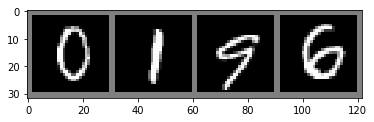

In [20]:
def imshow(img):
    print(type(img))
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

classes = [i for i in range(10)]

In [21]:
saved_images = images

<class 'torch.Tensor'>


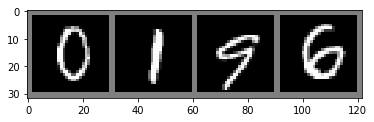

In [22]:
imshow(torchvision.utils.make_grid(saved_images))

In [23]:
outputs = model(saved_images)
print(outputs)

tensor([[-1.6556e-03, -2.1578e+01, -1.6048e+01, -2.0016e+01, -2.2252e+01,
         -1.6572e+01, -6.4095e+00, -2.4565e+01, -1.1709e+01, -2.3515e+01],
        [-2.5093e+01, -4.6342e-03, -1.1064e+01, -1.0559e+01, -1.2019e+01,
         -1.5326e+01, -2.2408e+01, -5.3871e+00, -1.5814e+01, -1.6258e+01],
        [-5.4139e+01, -6.4005e+01, -5.1547e+01, -3.5755e+01, -2.5117e+01,
         -2.2634e+01, -6.3543e+01, -2.8425e+01, -3.1745e+01, -1.6082e-10],
        [-1.7407e+01, -5.0221e+01, -4.1478e+01, -4.5270e+01, -4.9102e+01,
         -2.5551e+01, -8.1819e-08, -6.7176e+01, -1.6730e+01, -5.4958e+01]])


In [10]:


_, predicted = torch.max(outputs, 1)

print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

tensor([ 6,  5,  7,  9])
Predicted:      6     5     7     9


In [11]:
print(model)


Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [12]:
someResult = model.forward(saved_images)

In [13]:
print(someResult)

tensor([[-1.6963e+01, -5.1892e+01, -4.3222e+01, -3.8926e+01, -3.5387e+01,
         -2.0146e+01, -4.4908e-08, -5.4795e+01, -2.2619e+01, -4.6532e+01],
        [-2.5292e+01, -5.1954e+01, -3.1431e+01, -2.1439e+01, -4.4763e+01,
         -2.1924e-02, -1.3240e+01, -5.1650e+01, -3.8312e+00, -2.1702e+01],
        [-4.6613e+01, -2.3363e+01, -1.6379e+01, -3.9726e+01, -2.7398e+01,
         -4.2724e+01, -5.7138e+01, -7.7084e-08, -3.2202e+01, -3.0202e+01],
        [-2.5700e+01, -3.9842e+01, -2.2987e+01, -2.1916e+01, -1.5483e+01,
         -1.7548e+01, -3.8848e+01, -6.8502e+00, -1.9877e+01, -1.0600e-03]])


In [14]:
print(model.named_parameters())

grad_of_params = {}
for name, parameter in model.named_parameters():
    grad_of_params[name] = parameter
    
print(grad_of_params['conv1.weight'])

<generator object Module.named_parameters at 0x1201a0308>
tensor([[[[-0.1922,  0.4633, -0.0422, -0.0129,  0.0000],
          [-0.0085,  0.3128, -0.0549, -0.2520, -0.0294],
          [ 0.6815,  0.0363, -0.2059, -0.1711, -0.0461],
          [ 0.0478, -0.1730, -0.1338, -0.0563, -0.3068],
          [-0.2178, -0.0386, -0.0844,  0.0563, -0.2842]]],


        [[[-0.1831, -0.0211, -0.0055,  0.1204,  0.4927],
          [-0.2913, -0.0714, -0.0300, -0.0988,  0.4072],
          [-0.1502, -0.2776, -0.0892, -0.0410,  0.2818],
          [-0.0530, -0.1645, -0.1664, -0.1081,  0.0789],
          [ 0.1083,  0.0514, -0.0119,  0.0082,  0.3213]]],


        [[[-0.5004, -0.1118,  0.0810, -0.0055, -0.4849],
          [-0.1172,  0.0295,  0.0921, -0.2980, -0.2721],
          [-0.3657,  0.0172,  0.0918, -0.0769,  0.1420],
          [-0.0558, -0.0613,  0.0602,  0.4388,  0.5791],
          [ 0.2211,  0.0698,  0.0315, -0.0801, -0.2004]]],


        [[[-0.4000, -0.1102,  0.4048,  0.0904,  0.0413],
          [-0.2973